In [24]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
from utils import CustomDataset, compute_metrics

In [25]:
# global defines
filepath = 'RSSCN7/'

In [35]:
# example_grass = cv2.imread(filepath + 'aGrass/a001.jpg', cv2.IMREAD_COLOR)
# cv2.imshow("Image", example_grass)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

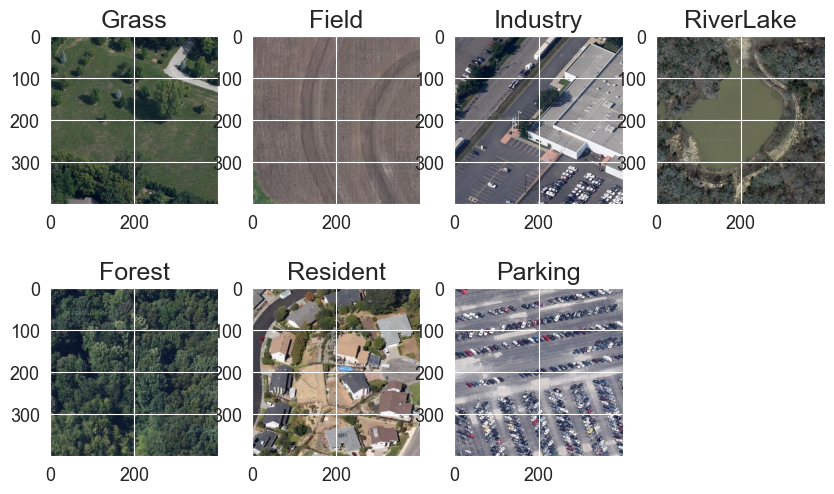

In [27]:
# Sample Image for each class
# TODO: fix weird color... using cv2.imshow shows image correctly
sample_images = [
    {'title': 'Grass', 'image': cv2.imread(filepath + 'aGrass/a001.jpg', cv2.IMREAD_COLOR)},
    {'title': 'Field', 'image': cv2.imread(filepath + 'bField/b001.jpg', cv2.IMREAD_COLOR)},
    {'title': 'Industry', 'image': cv2.imread(filepath + 'cIndustry/c001.jpg', cv2.IMREAD_COLOR)},
    {'title': 'RiverLake', 'image': cv2.imread(filepath + 'dRiverLake/d001.jpg', cv2.IMREAD_COLOR)},
    {'title': 'Forest', 'image': cv2.imread(filepath + 'eForest/e001.jpg', cv2.IMREAD_COLOR)},
    {'title': 'Resident', 'image': cv2.imread(filepath + 'fResident/f001.jpg', cv2.IMREAD_COLOR)},
    {'title': 'Parking', 'image': cv2.imread(filepath + 'gParking/g001.jpg', cv2.IMREAD_COLOR)},
]
plt.figure(figsize=(10, 6))
for index, sample_image in enumerate(sample_images):
    plt.subplot(2, 4, index + 1)
    plt.title(sample_image['title'])
    # plt.imshow(cv2.cvtColor(sample_image['image'], cv2.COLOR_BGR2RGB))
    plt.imshow(sample_image['image'])

plt.show()

In [28]:
# load each class using cv2, convert in grayscale, normalize to 0,1
# TODO: load images in grayscale or RGB?
data_grass = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                       for file in glob.glob(filepath + 'aGrass/*.jpg')])
labels = np.repeat(0, data_grass.shape[0])

data_field = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                       for file in glob.glob(filepath + 'bField/*.jpg')])
labels = np.concatenate((labels,np.repeat(1, data_field.shape[0])))

data_industry = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                          for file in glob.glob(filepath + 'cIndustry/*.jpg')])
labels = np.concatenate((labels,np.repeat(2, data_industry.shape[0])))

data_riverLake = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                           for file in glob.glob(filepath + 'dRiverLake/*.jpg')])
labels = np.concatenate((labels,np.repeat(3, data_riverLake.shape[0])))

data_forest = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                        for file in glob.glob(filepath + 'eForest/*.jpg')])
labels = np.concatenate((labels,np.repeat(4, data_forest.shape[0])))

data_resident = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                          for file in glob.glob(filepath + 'fResident/*.jpg')])
labels = np.concatenate((labels,np.repeat(5, data_resident.shape[0])))

data_parking = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                         for file in glob.glob(filepath + 'gParking/*.jpg')])
labels = np.concatenate((labels,np.repeat(6, data_parking.shape[0])))

In [29]:
all_data = np.concatenate((data_grass, data_field, data_industry, data_riverLake, data_forest, data_resident, data_parking))

In [30]:
# resize images to 100x100 to improve calculation speed
# TODO: not sure if necessary
all_data_resized = np.array([cv2.resize(img, (100, 100)) for img in all_data])

In [31]:
print("data shape: ", all_data_resized.shape)
print("label shape: ", labels.shape)

data shape:  (2800, 100, 100)
label shape:  (2800,)


In [32]:
test_size = 0.2
batch_size = 5

In [33]:
# create train and test data, also shuffle data
# run operation on indexes to save memory
data_indexes = np.arange(0, all_data_resized.shape[0])
train_indexes, test_indexes  = train_test_split(data_indexes, test_size=test_size, random_state=1905)
X_train = all_data_resized[train_indexes]
X_test = all_data_resized[test_indexes]
y_train = labels[train_indexes]
y_test = labels[test_indexes]
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2240, 100, 100)
X_test shape:  (560, 100, 100)


In [36]:
dataset_train = CustomDataset(X_train, y_train)
dataset_test = CustomDataset(X_test, y_test)

trainset = DataLoader(X_train, batch_size=batch_size, shuffle=False)
testset = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)